# Digital Baseband Modulation

Baseband modulation involves mapping bits into symbols for RF transmission. The reason data bits need to be converted into symbols is to better utilize the RF spectrum and optimize the transmissions for the wireless channel. Multiple bits can be represented by a single symbol of a modulation scheme, increasing the throughput. Additionally different modulation schemes will perform better at given channel conditions than others.

This notebook will cover some of the more popular single carrier digital modulation schemes: Amplitude Shift Keying (ASK), Phase Shift Keying (PSK), Frequency Shift Keying (FSK) and Quadrature Amplitude Modulation (QAM).

## Complex Representation

Before getting into the nitty gritty, it is important to understand complex representation as that is how we visualize and evaluate a majority of modulation schemes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create 10 random bits
bits = np.random.randint(0, 2, 10)
pulses = np.array([1 if x==1 else -1 for x in bits])

<StemContainer object of 3 artists>

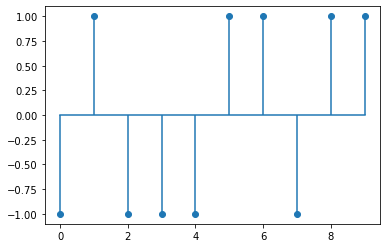

In [3]:
plt.stem(pulses, basefmt="-")

(-1.0, 1.0)

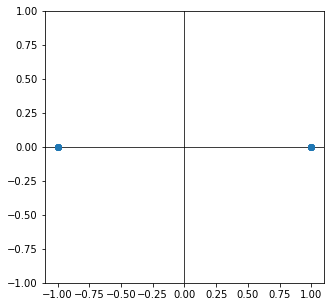

In [4]:
plt.figure(figsize=(5,5))
plt.axhline(y=0, color='k', linewidth=0.75)
plt.axvline(x=0, color='k', linewidth=0.75)
plt.plot(pulses.real, pulses.imag, 'o')
plt.ylim((-1,1))
# plt.grid()

## Amplitude Shift Keying (ASK)

One of the simplest modulation schemes is ASK. Using this modulation scheme our signal will maintain a constant phase and frequency, however the amplitude will vary and determine which symbol is being transmitted.

### 2-ASK

First example will be 2-ASK, meaning we will have 2 levels of transmission, each representing a bit of data. Another name for this modulation scheme is OOK (On-Off Keying).

The parameters used here are arbitrary and picked for ease of plotting for demonstration purposes.

In [5]:
# Arbitary simulation params
num_bits = 100 # number of data bits to be transmitted
fs = 2000 # sampling frequency
f_c = 100 # carrier frequency
sps = 64 # samples per symbol

Generate random stream of bits and upsample so it can neatly be modulated onto our carrier.

In [6]:
# Generate values consisting of only [0,1], the specified 2 in the range is exclusive
bits = np.random.randint(0,2,num_bits)
# Technically this is "square" pulse shaping, the worst of all pulse shapings
bits_upsampled = np.repeat(bits, sps)

Now create a carrier and modulate our symbols (in this case no different to bits) to the carrier by simply multiplying the two.

In [7]:
carrier = np.sin(2*np.pi*f_c/fs*np.arange(len(bits_upsampled)))
carrier_modulated_2ask = carrier*(bits_upsampled)

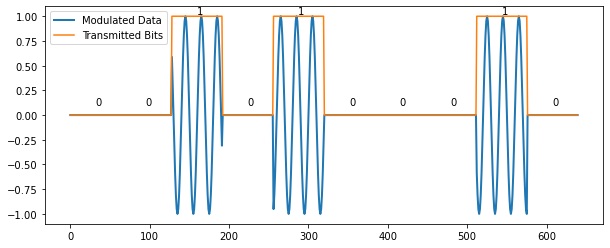

In [8]:
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_2ask[:10*64], linewidth=2)
for i in range(10):
    plt.text(32+i*64-1, 1+0.02 if bits[i] == 1 else 0.1, bits[i])
plt.plot(bits_upsampled[:10*64])
plt.legend(('Modulated Data', 'Transmitted Bits'))

### 4-ASK

To make it slightly more interesting, we can increase the efficiency of our modulation scheme by transmitting more bits per symbol, there are essentially no downsides of doing this since we are not dealing with any channels yet. 

In [9]:
# Same parameters as before
num_bits = 100
fs = 2000
f_c = 100
sps = 64

Now instead of generating 2 possible values for transmission, we generate 4.

In [10]:
bits = np.random.randint(0,4,num_bits)
bits_upsampled = np.repeat(bits, sps)
carrier = np.sin(2*np.pi*f_c/fs*np.arange(len(bits_upsampled)))
carrier_modulated_4ask = carrier*(bits_upsampled)

In [11]:
bit_pairs = {0: '00',
             1: '01',
             2: '10',
             3: '11'}

([], [])

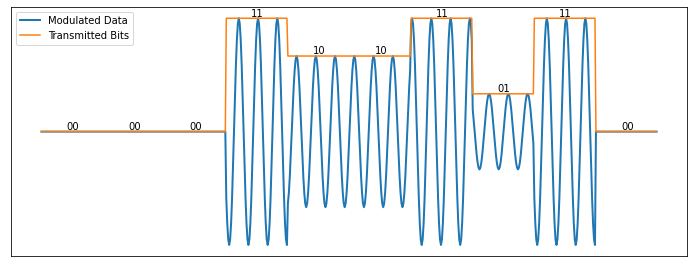

In [12]:
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_4ask[:10*64], linewidth=2)
for i in range(10):
    plt.text(32+i*64-6, bits[i]+0.05, bit_pairs[bits[i]])
plt.plot(bits_upsampled[:10*64])
plt.legend(('Modulated Data', 'Transmitted Bits'))
# plt.xlabel('Time'); plt.ylabel('Amplitude')
plt.tight_layout()
plt.xticks([])
plt.yticks([])
# plt.savefig('ask4.png')

We can also look at our modulation symbols on constellation diagram, but it is not very interesting, because all symbols are purely real.

(-1.0, 1.0)

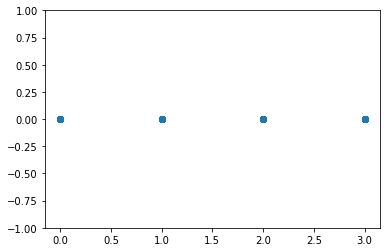

In [13]:
plt.plot(bits.real, bits.imag, 'o')
plt.ylim((-1,1))

## Phase Shift Keying (PSK)

### Binary Phase Shift Keying (BPSK)

BPSK or 2-PSK is the simplest modulation scheme based on phase and is one of the most popular single carrier modulation schemes due to its robustness in noise. For example, sophisticated communications systems will be able to transmit many levels of PSK or QAM modulated data, however in harsher channel conditions the modulation level will always drop to a lower level modulation scheme. BPSK is typically the lowest one you can achieve.

In [14]:
num_bits = 1000
fs = 2000
f_c = 100
sps = 32

bits = np.random.randint(0,2,num_bits)

Unlike ASK, where we used our bits directly with the carrier, here we will have to define a little dictionary that maps our bits to symbols. In BPSK this is very basic.

In [15]:
symbol_dict = {0: -1+0j,
               1: +1+0j}

# Map the bits to the symbols
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))

Look at the symbols in the constellation plot. Similarly to to ASK, BPSK isn't very exciting because all symbols are real (using a single channel).

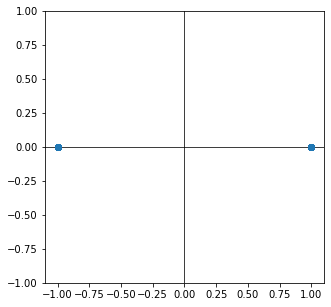

In [16]:
plt.figure(figsize=(5,5))
plt.axhline(y=0, color='k', linewidth=0.75)
plt.axvline(x=0, color='k', linewidth=0.75)
plt.ylim((-1,1))
plt.plot(symbols.real, symbols.imag, 'o')

In [17]:
# Again, upsampling is a simple "square" pulse shape
symbols_upsampled = np.repeat(symbols, sps)

# We pass the angle (in radians) of our symbols to the sine generator
# in order to modulate our symbols onto the carrier
carrier_modulated_bpsk = \
np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled))+np.angle(symbols_upsampled))

After upsampling and modulating onto a carrier, we can see how the phase differences of the symbols manifest in the carrier signal -- observe the little discontinuities in the sine wave. Every time a symbol changes we basically reverse the direction of the sine wave by multiplying it by a -1.

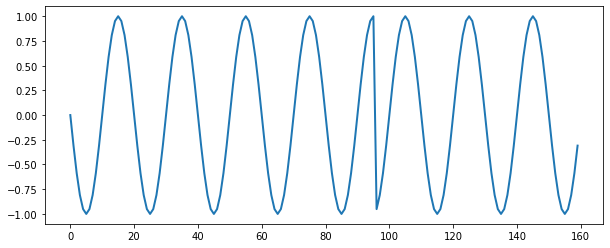

In [18]:
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_bpsk[:5*32], linewidth=2)

Here's an overlaying plot that makes it a bit clearer where transitions happen.

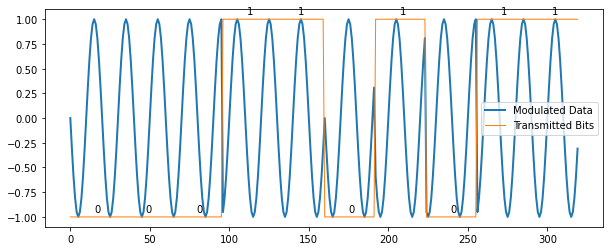

In [19]:
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_bpsk[:10*32], linewidth=2)
for i in range(10):
    plt.text(16+i*32-1, bits[i]+0.05 if bits[i]==1 else bits[i]-0.95, bits[i])
plt.plot(symbols_upsampled[:10*32].real, linewidth=1)
plt.legend(('Modulated Data', 'Transmitted Bits'))

## Quadrature Phase Shift Keying (QPSK)

QPSK is a bit more exciting than BPSK because this time it is using both I/Q channels. It is oftentimes preferred to BPSK because it can achieve the same BER, but at twice the throughput because of this doubling of the channels.

The process is exactly the same, the dictionary of available symbols is twice that of BPSK because now we can transmit 2 bits per symbol.

In [20]:
# Arbitrary simulation parameters
num_bits = 1000
fs = 2000
f_c = 100
sps = 32

# Our "bits" are integers in range of [0,3]
bits = np.random.randint(0,4,num_bits)

symbol_dict = {0: +1+1j,
               1: +1-1j,
               2: -1+1j,
               3: -1-1j}

# Map bits to symbols
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))

Now our constellation plot is actually useful for once.

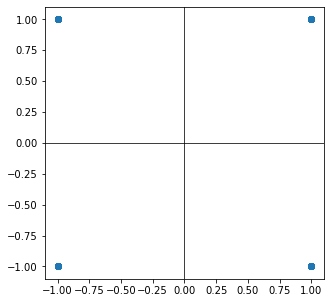

In [21]:
plt.figure(figsize=(5,5))
plt.axhline(y=0, color='k', linewidth=0.75)
plt.axvline(x=0, color='k', linewidth=0.75)
plt.plot(symbols.real, symbols.imag, 'o')

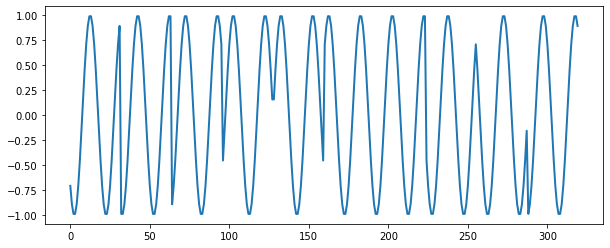

In [22]:
# Perform upsampling and "square" pulse shaping
symbols_upsampled = np.repeat(symbols, sps)

# Modulate onto a carrier
carrier_modulated_qpsk = \
np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled))+np.angle(symbols_upsampled))

# Visualize the discontinuities signifying symbol transitions
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_qpsk[:10*32], linewidth=2)

### 8-PSK

I'm going to show 8-PSK here because it makes the distinction between other modulation schemes a bit clearer, especially QAM.

In [54]:
# Arbitrary simulation parameters
num_bits = 1000
fs = 2000
f_c = 100
sps = 32

# Our "bits" are integers in range of [0,3]
bits = np.random.randint(0,8,num_bits)

symbol_dict = {0: 1+0j,
               1: 0.7071+0.7071j,
               2: 0+1j,
               3: -0.7071+0.7071j,
               4: -1+0j,
               5: -0.7071-0.7071j,
               6: 0-1j,
               7: 0.7071-0.7071j}

# Map bits to symbols and apply square pulse shaping for transmission
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))

Now we can see the iconic circle that is a signature look of PSK. Note that as we add more and more symbols here we need to squeeze in more and more symbols next to each other on the circle edge, because by definition the amplitude is constant.

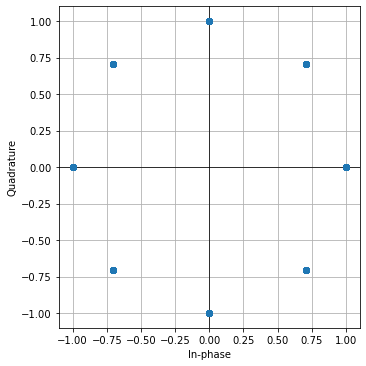

In [55]:
plt.figure(figsize=(5,5))
plt.axhline(y=0, color='k', linewidth=0.75)
plt.axvline(x=0, color='k', linewidth=0.75)
plt.plot(symbols.real, symbols.imag, 'o')
plt.grid()
plt.tight_layout()
plt.xlabel('In-phase'); plt.ylabel('Quadrature')
plt.savefig('figures/psk8_constellation.png', dpi=300, bbox_inches="tight")

Can see the effects of this in the time domain as well.

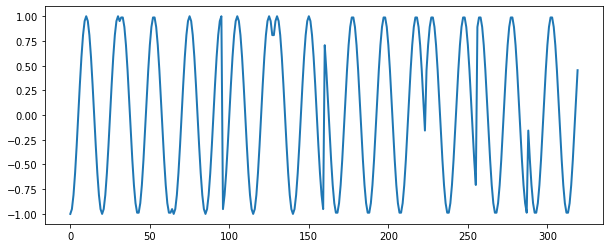

In [25]:
# Do the upsampling
symbols_upsampled = np.repeat(symbols, sps)

# Modulate onto a carrier
carrier_modulated_8psk = \
np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled))+np.angle(symbols_upsampled))

# Visualize the discontinuities signifying symbol transitions
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_8psk[:10*32], linewidth=2)

This modulation scheme works well for systems where amplitude may vary a bit, but phase noise is miminal. However to maximize throughput, we want to maximize the average euclidean distance between nearest neighbours in a constellation diagram -- intuitively, the more space the little dots have around them the more tolerance for noise effects.

## Quadrature Amplitude Modulation (QAM)

QAM is likely one of the most prominent modulation schemes in digital comms, found in Wifi, LTE 4G, 5G, etc. All the big boy standards. It uses both phase and amplitude to represent different symbols and this allows it to fulfill that euclidian distance condition we had a problem with in PSK.

### 16-QAM

In [52]:
num_bits = 1000
fs = 2000
f_c = 100
sps = 32

bits = np.random.randint(0,16,num_bits)

symbol_dict = {0: -3-3j,
               1: -3-1j,
               2: -3+3j,
               3: -3+1j,
               4: -1-3j,
               5: -1-1j,
               6: -1+3j,
               7: -1+1j,
               8: 3-3j,
               9: 3-1j,
               10: 3+3j,
               11: 3+1j,
               12: 1-3j,
               13: 1-1j,
               14: 1+3j,
               15: 1+1j}

# We divide symbols by 3 so they're normalize to -1,1.
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))/3

Note how the symbols are much more evenly distributed in the constellation diagram when compared to the previous modulation schemes.

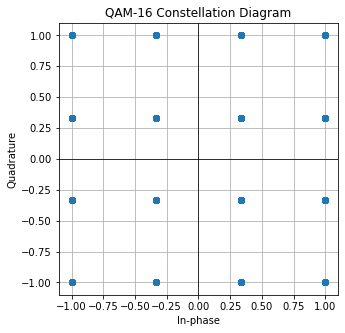

In [53]:
plt.figure(figsize=(5,5))
plt.axhline(y=0, color='k', linewidth=0.75)
plt.axvline(x=0, color='k', linewidth=0.75)
plt.plot(symbols.real, symbols.imag, 'o')
plt.xlabel('In-phase'); plt.ylabel('Quadrature')
plt.title('QAM-16 Constellation Diagram')
plt.grid()
plt.savefig('figures/qam16_constellation.png', dpi=300, bbox_inches='tight')

In [ ]:
# Apply white noise to our signal so that the SNR is 20dB
qam_symbols_20db = awgn(qam_symbols, 20)

plt.figure(figsize=(5,5))
plt.scatter(symbols.real, symbols.imag)
plt.scatter(np.real(qam_scheme), np.imag(qam_scheme), s=120, c='red', marker='x')
plt.grid()
plt.title('QAM-16 constellation diagram at 20dB')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.legend(('Received symbols', 'Reference points'), \
           bbox_to_anchor=(1, 1), loc='upper left')



We upsample just like before, however one key difference for transmitting these symbols is we include ampltidue information as well with the `np.abs(upsampled_symbols)`, while `np.angle(symbols_upsampled)` is still carrying the phase information.

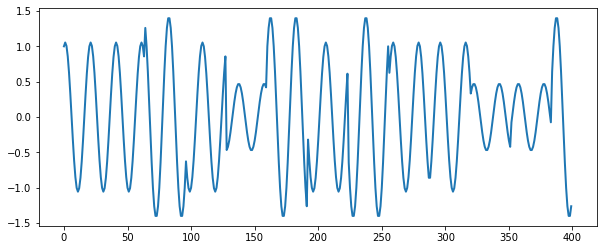

In [28]:
symbols_upsampled = np.repeat(symbols, sps)

carrier_modulated_16qam = \
np.abs(symbols_upsampled) * np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled))+np.angle(symbols_upsampled))

plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_16qam[:400], linewidth=2)

## Frequency Shift Keying (FSK)

FSK is a robust and practical modulation scheme used by widespread standards like Bluetooth(!). I don't explore it much in my thesis but it's a nice one to cover and understand because it's one of the major trio -- ampltidue, phase and frequency.

### 2-FSK

Simple 2-tone modulation will simply transmit the carrier at 2 distinct frequencies.

In [29]:
fs = 2000
num_bits = 1000
sps = 64

bits = np.random.randint(0,2,num_bits)
bits_upsampled = np.repeat(bits, sps)

# select frequencies that will be easy to eyeball in a time series plot
freqs = np.array([50 if x==0 else 150 for x in bits_upsampled])

# carrier modulation -- freqs replaces fc
carrier_modulated_2fsk = np.sin(((2*np.pi*freqs)/fs*np.arange(len(freqs))))

For 2-FSK it's quite easy to distinguish the different symbols from the frequencies of the time domain signal.

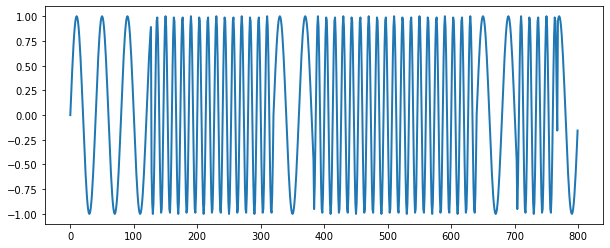

In [30]:
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_2fsk[:800], linewidth=2)
# for i in range(10):
#     plt.text(32+i*64-1, bits[i]+0.05, bits[i])
# plt.plot(bits_upsampled, linewidth=1)

Note the sharp transitions between the symbols. This is because the phase isn't consistent between transitions -- a solution for the phase inconsistency is Continuous Phase Frequency Shift Keying (CPFSK). There's a very nice explanation and example on this stackoverflow post: https://dsp.stackexchange.com/questions/80768/fsk-modulation-with-python

Using the stackoverflow post as reference we can tweak the 2-FSK example and implement 2-CPFSK.

In [31]:
delta_phi = freqs * np.pi / (fs / 2)
phi = np.cumsum(delta_phi)
phi = (phi + np.pi) % (2 * np.pi) - np.pi # roll back phase to avoid adding to infinity
carrier_modulated_2cpfsk = np.sin(phi)

Now the transitions are nice and continuous

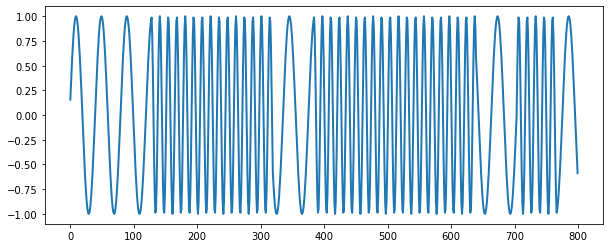

In [32]:
plt.figure(figsize=(10,4))
plt.plot(carrier_modulated_2cpfsk[:800], linewidth=2)
# plt.plot(bits_upsampled)

Text(0, 0.5, 'Normalized frequency response')

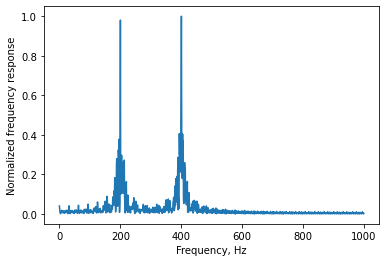

In [332]:
fs = 2000
num_bits = 2100
sps = 64

bits = np.random.randint(0,2,num_bits)
bits_upsampled = np.repeat(bits, sps)

# select frequencies that will be easy to eyeball in a time series plot
freqs = np.array([200 if x==0 else 400 for x in bits_upsampled])

# carrier modulation -- freqs replaces fc
carrier_modulated_2fsk = np.sin(((2*np.pi*freqs)/fs*np.arange(len(freqs))))

fft_size = 2048

y_fft = np.fft.fft(carrier_modulated_2fsk,fft_size)
y_fft_sinc = np.fft.fftshift(y_fft)[int(fft_size/2):]/np.max(np.abs(y_fft))
freqs_fft = np.fft.fftfreq(fft_size,1/fs)
freqs = np.fft.fftshift(freqs_fft)[int(fft_size/2):]
plt.plot(freqs, np.abs(y_fft_sinc))
plt.xlabel('Frequency, Hz'); plt.ylabel('Normalized frequency response')

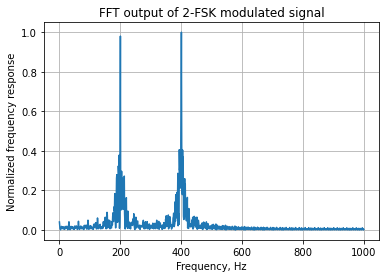

In [336]:
y_fft = np.fft.fft(carrier_modulated_2fsk,fft_size)
y_fft_sinc = np.fft.fftshift(y_fft)[int(fft_size/2):]/np.max(np.abs(y_fft))
freqs_fft = np.fft.fftfreq(fft_size,1/fs)
freqs = np.fft.fftshift(freqs_fft)[int(fft_size/2):]
plt.plot(freqs, np.abs(y_fft_sinc))
plt.xlabel('Frequency, Hz'); plt.ylabel('Normalized frequency response')
plt.title('FFT output of 2-FSK modulated signal')
plt.grid()
# plt.tight_layout()
# plt.savefig('figures/fsk2_fft.png', dpi=300)

Same principles would apply to 4-FSK, 8-FSK, etc.

## Pulse Shaping

Pulse shaping is an essential part of the wireless transmitter as it shapes the outgoing symbols in a way that bandlimits the signal, minimizing spectral leakage to adjacent channels.

### Square Pulse Shape

Technically all previous examples, where we applied upsampling, have been pulse shaped with what is called a "square" pulse shape.

<StemContainer object of 3 artists>

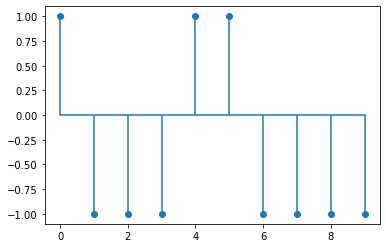

In [207]:
# Create some pulses (or symbols)
bits = np.random.randint(0, 2, 10000)
pulses = np.array([1 if x==1 else -1 for x in bits])
plt.stem(pulses[:10], basefmt="-")

We create a square pulse shape by simply repeating the pulses (symbols). Now the pulses look somewhat like square shapes, hence the name.

<StemContainer object of 3 artists>

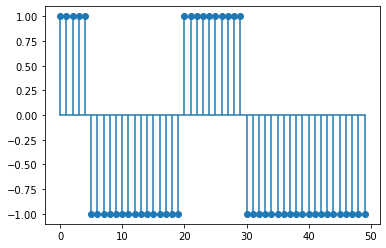

In [208]:
plt.stem(np.repeat(pulses[:10],5), basefmt="-")
# plt.plot(np.repeat(pulses,5))

### Sinc

In practice pulse shaping involves filtering symbols with a sinc-based pulse shaping filter. While a square shape will not prevent any spectral leakage, the filters based on the sinc shape are often used to effectively bandlimit transmitted signals according to various regulatory standards.

The sinc function is defined as:

$sinc(x) = \frac{sin(x)}{x}$

However the sinc function implemented in numpy `np.sinc()` is

$sinc(x) = \frac{sin(\pi x)}{\pi x}$

Below is an example of creating a simple 65 weight sinc filter:

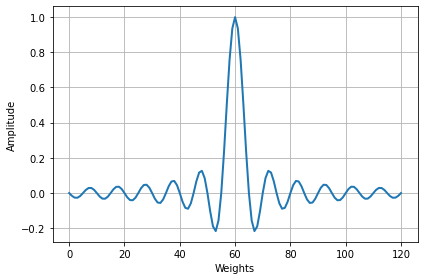

In [209]:
T = 1 # sample period
sps = 5 # symbol period in samples
num_weights = 121
x = np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/sps/T
sinc_weights = np.sinc(x)
# sinc_weights = sinc_weights/np.max(sinc_weights)
plt.plot(sinc_weights, linewidth=2)
plt.xlabel('Weights'); plt.ylabel('Amplitude')
plt.tight_layout()
plt.grid()
# plt.savefig('figures/sinc.png', dpi=300, bbox_inches='tight')

In order to apply sinc pulse shaping to the pulses, we convolve the filter weights with the samples of the input stream.

In [210]:
square_pulses = np.repeat(pulses,10)
sinc_pulses = np.convolve(square_pulses, sinc_weights, mode='full')

In order to overlay the pulse shaped signals over each other we need to perform some indexing shenanigans due to transients and what have you.

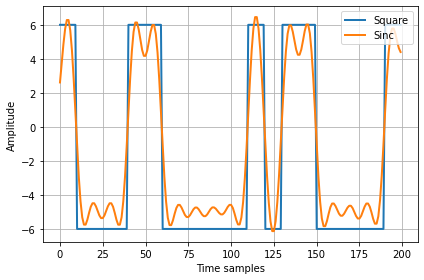

In [211]:
# plt.figure(figsize=(7,4))
plt.plot(square_pulses[:200]*6, linewidth=2)
plt.plot(sinc_pulses[int((len(sinc_weights)-1)/2):int((len(sinc_weights)-1)/2)+200], linewidth=2)
plt.grid()
plt.xlabel('Time samples'); plt.ylabel('Amplitude')
plt.legend(('Square', 'Sinc'), loc='upper right')
plt.tight_layout()
# plt.savefig('figures/square_vs_pulse_time.png', dpi=300, bbox_inches='tight')

It may not seem obvious from the time series plots why the pulse shape is advantageous. It will become clearer after we apply an FFT to the pulses.

### Pulse shaping in frequency domain

Using the previously generated pulse shaped signals let's compare the FFTs. First lets plot the FFT of the square pulse shaped symbols.

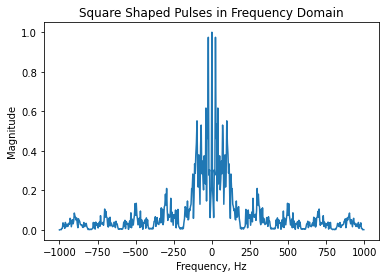

In [212]:
fft_size = 512

y_fft = np.fft.fft(square_pulses,fft_size)
y_fft_square = np.fft.fftshift(y_fft)#[int(fft_size/2):]
freqs_fft = np.fft.fftfreq(fft_size,1/fs)
freqs = np.fft.fftshift(freqs_fft)#[int(fft_size/2):]

# Plot the result
plt.plot(freqs, np.abs(y_fft_square)/np.max(np.abs(y_fft_square)))
plt.xlabel('Frequency, Hz')
plt.ylabel('Magnitude')
plt.title('Square Shaped Pulses in Frequency Domain')
# plt.ylim((0,50))
plt.show()

Note that this signal occupies the entire observable bandwidth. 

Now for the sinc pulse shaped signal.

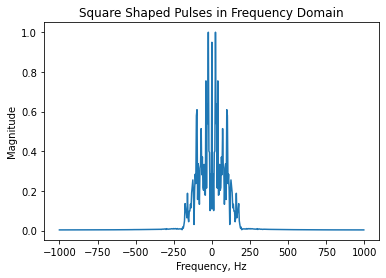

In [213]:
fft_size = 512

y_fft = np.fft.fft(sinc_pulses,fft_size)
y_fft_sinc = np.fft.fftshift(y_fft)#[int(fft_size/2):]
freqs_fft = np.fft.fftfreq(fft_size,1/fs)
freqs = np.fft.fftshift(freqs_fft)#[int(fft_size/2):]

# Plot the result
plt.plot(freqs, np.abs(y_fft_sinc)/np.max(np.abs(y_fft_sinc)))
plt.xlabel('Frequency, Hz')
plt.ylabel('Magnitude')
plt.title('Square Shaped Pulses in Frequency Domain')
plt.show()

Much better! Because of the pulse shaping there are no more sharp transitions between the symbols which translates into a much nicer frequency response.

We can also overlay the 2 plots on top of each other for a better view.

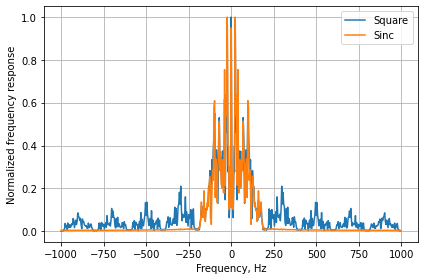

In [215]:
plt.plot(freqs, np.abs(y_fft_square)/np.max(np.abs(y_fft_square)))
plt.plot(freqs, np.abs(y_fft_sinc)/np.max(np.abs(y_fft_sinc)))
plt.legend(('Square','Sinc'))
plt.grid()
plt.xlabel('Frequency, Hz'); plt.ylabel('Normalized frequency response')
plt.tight_layout()
plt.savefig('figures/square_vs_pulse_freq.png', dpi=300, bbox_inches='tight')

That's the motivation behind pulse shaping. There are many more pulse shape types, like Raised Cosine, and various ways to tune it for different bandwidths. However the sinc is enough to understand the principle of why pulse shaping is necessary.

Text(0.5, 0, 'Filter weight index')

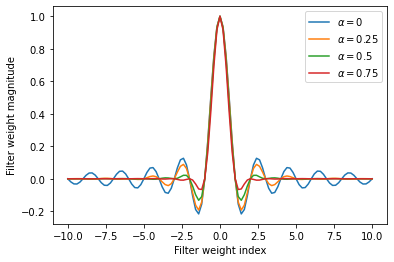

In [129]:
sps = 5
num_weights = 101
x = 0.9999*np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/sps

alphas = [0, 0.25, 0.5, 0.75]
for alpha in alphas:
    raised_cos_weights = np.sinc(x)*(np.cos(alpha*np.pi*x)/(1-((2*alpha*x)**2)))
    plt.plot(x,raised_cos_weights)

plt.legend((r'$\alpha = 0$', r'$\alpha = 0.25$', r'$\alpha = 0.5$', r'$\alpha = 0.75$'))
plt.ylabel('Filter weight magnitude')
plt.xlabel('Filter weight index')

Text(0, 0.5, 'Magnitude, dB')

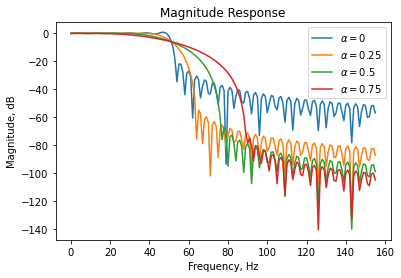

In [130]:
sps = 5
num_weights = 121
x = 0.9999*np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/sps

for alpha in alphas:
    raised_cos_weights = np.sinc(x)*(np.cos(alpha*np.pi*x)/(1-((2*alpha*x)**2)))

    rcos_response = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(raised_cos_weights, fft_size)))/sps)
    plt.plot(rcos_response[int(fft_size/2):-100])
    
plt.legend((r'$\alpha = 0$', r'$\alpha = 0.25$', r'$\alpha = 0.5$', r'$\alpha = 0.75$'))
plt.title('Magnitude Response')
plt.xlabel('Frequency, Hz')
plt.ylabel('Magnitude, dB')

<ipython-input-132-36d1fdfbe472>:10: RuntimeWarning: invalid value encountered in true_divide
  h_rrc = 1/Ts*(np.sin(np.pi*x*(1-alpha)) + 4*alpha*x*np.cos(np.pi*x*(1+alpha)))/(np.pi*x*(1-(4*alpha*x)**2))


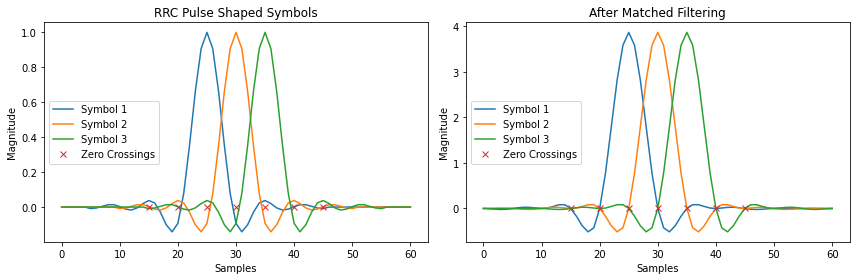

In [132]:
# Base parameters, same as rcos in the previous example
fs = 5
Ts =  1/fs
alpha = 0.5

num_weights = 41
x = np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/fs

# Impulse response according to definition
h_rrc = 1/Ts*(np.sin(np.pi*x*(1-alpha)) + 4*alpha*x*np.cos(np.pi*x*(1+alpha)))/(np.pi*x*(1-(4*alpha*x)**2))

# Find and replace the center weight according to the first part of the formula
h_rrc[int(num_weights/2)] = 1/Ts*(1+alpha*(4/np.pi - 1))

# Normalize the weights
h_rrc = h_rrc/np.max(h_rrc)

# Generate pulse vectors
pulse1 = np.zeros(21,)
pulse2 = np.zeros(21,)
pulse3 = np.zeros(21,)
pulse1[5] = 1
pulse2[10] = 1
pulse3[15] = 1

# Pulse shape each symbol separately 
symbol1_rrc = np.convolve(pulse1,h_rrc).real
symbol2_rrc = np.convolve(pulse2,h_rrc).real
symbol3_rrc = np.convolve(pulse3,h_rrc).real

# Pulse shape with matched filter
symbol1_matched = np.convolve(symbol1_rrc,h_rrc).real[20:-20]
symbol2_matched = np.convolve(symbol2_rrc,h_rrc).real[20:-20]
symbol3_matched = np.convolve(symbol3_rrc,h_rrc).real[20:-20]

# Plot them all
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Only RRC filtered pulses
ax[0].plot(symbol1_rrc)
ax[0].plot(symbol2_rrc)
ax[0].plot(symbol3_rrc)
ax[0].plot([15,20,25,30,35,40,45], [0,0,0,0,0,0,0], 'x')
ax[0].set_title('RRC Pulse Shaped Symbols')
ax[0].set_ylabel('Magnitude')
ax[0].set_xlabel('Samples')
ax[0].legend(('Symbol 1', 'Symbol 2', 'Symbol 3', 'Zero Crossings'), loc='center left')

# Twice RRC filtered pulses, demonstrating matched filtering
ax[1].plot(symbol1_matched)
ax[1].plot(symbol2_matched)
ax[1].plot(symbol3_matched)
ax[1].plot([15,20,25,30,35,40,45], [0,0,0,0,0,0,0], 'x')
ax[1].set_title('After Matched Filtering')
ax[1].set_ylabel('Magnitude')
ax[1].set_xlabel('Samples')
ax[1].legend(('Symbol 1', 'Symbol 2', 'Symbol 3', 'Zero Crossings'), loc='center left')
plt.tight_layout()

# Pulse shaped carrier

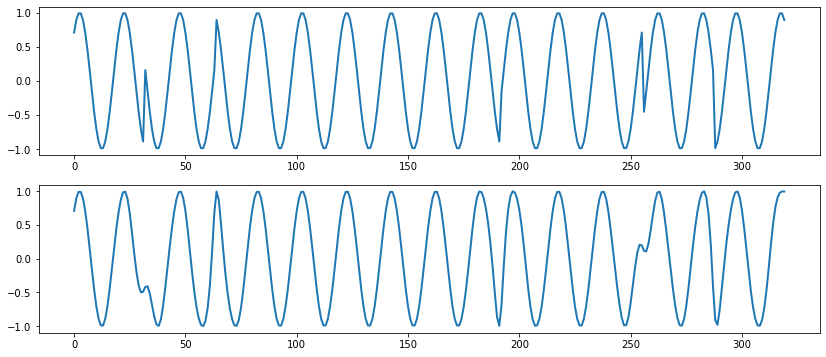

In [71]:
T = 1 # sample period
sps = 5 # symbol period in samples
num_weights = 131
x = np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/sps/T
sinc_weights = np.sinc(x)

# sps = 5
# num_weights = 101
# x = 0.9999*np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/sps
# alpha = 0.25
# raised_cos_weights = np.sinc(x)*(np.cos(alpha*np.pi*x)/(1-((2*alpha*x)**2)))

# Arbitrary simulation parameters
num_bits = 10000
fs = 2000
f_c = 100
sps = 32

# Our "bits" are integers in range of [0,3]
bits = np.random.randint(0,4,num_bits)

symbol_dict = {0: +1+1j,
               1: +1-1j,
               2: -1+1j,
               3: -1-1j}

# Map bits to symbols
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))

# Perform upsampling and "square" pulse shaping
symbols_upsampled = np.repeat(symbols, sps)
sinc_pulses = np.convolve(symbols_upsampled, raised_cos_weights, mode='same')

# Modulate onto a carrier
carrier_modulated_qpsk = \
np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled))+np.angle(symbols_upsampled))

carrier_modulated_qpsk_ps = \
np.sin((2*np.pi*f_c)/fs*np.arange(len(sinc_pulses))+np.angle(sinc_pulses))

# Visualize the discontinuities signifying symbol transitions
# plt.figure(figsize=(10,4))
fig, ax = plt.subplots(2,1, figsize=(14,6))
ax[0].plot(carrier_modulated_qpsk[:10*sps], linewidth=2)
ax[1].plot(carrier_modulated_qpsk_ps[:10*sps], linewidth=2)
# plt.plot(symbols_upsampled.real[2*64:10*64], linewidth=2)
# plt.plot(sinc_pulses.real[2*64:10*64]/6, linewidth=2)

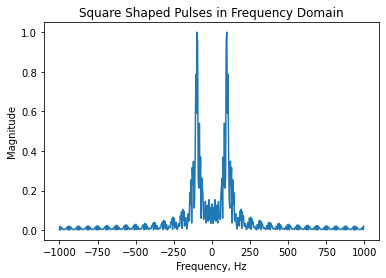

In [88]:
fft_size = 512

y_fft = np.fft.fft(carrier_modulated_qpsk,fft_size)
y_fft_square = np.fft.fftshift(y_fft)#[int(fft_size/2):]
freqs_fft = np.fft.fftfreq(fft_size,1/fs)
freqs = np.fft.fftshift(freqs_fft)#[int(fft_size/2):]

# Plot the result
plt.plot(freqs, np.abs(y_fft_square)/np.max(np.abs(y_fft_square)))
plt.xlabel('Frequency, Hz')
plt.ylabel('Magnitude')
plt.title('Square Shaped Pulses in Frequency Domain')
# plt.ylim((0,50))
plt.show()

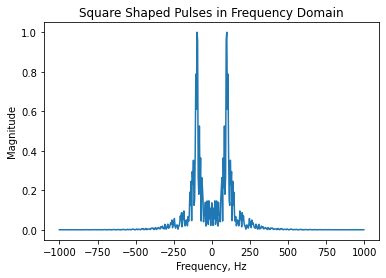

In [89]:
y_fft = np.fft.fft(carrier_modulated_qpsk_ps,fft_size)
y_fft_sinc = np.fft.fftshift(y_fft)#[int(fft_size/2):]
freqs_fft = np.fft.fftfreq(fft_size,1/fs)
freqs = np.fft.fftshift(freqs_fft)#[int(fft_size/2):]

# Plot the result
plt.plot(freqs, np.abs(y_fft_sinc)/np.max(np.abs(y_fft_sinc)))
plt.xlabel('Frequency, Hz')
plt.ylabel('Magnitude')
plt.title('Square Shaped Pulses in Frequency Domain')
plt.show()

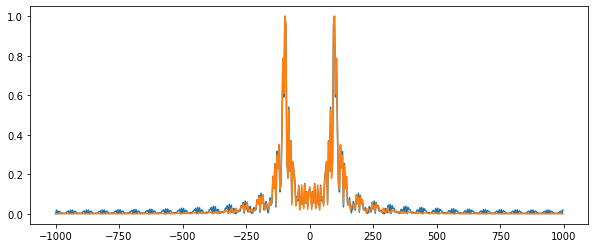

In [90]:
plt.figure(figsize=(10,4))
plt.plot(freqs, np.abs(y_fft_square)/np.max(np.abs(y_fft_square)))
plt.plot(freqs, np.abs(y_fft_sinc)/np.max(np.abs(y_fft_sinc)))

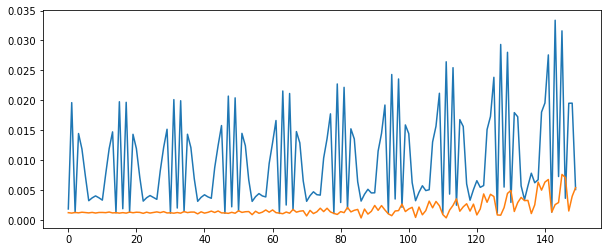

In [91]:
plt.figure(figsize=(10,4))
plt.plot((np.abs(y_fft_square)/np.max(np.abs(y_fft_square)))[:150])
plt.plot((np.abs(y_fft_sinc)/np.max(np.abs(y_fft_sinc)))[:150])

## Demodulation

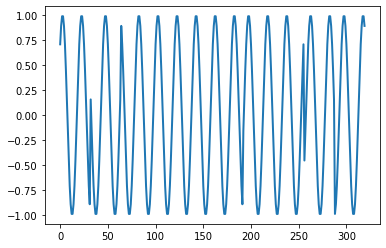

In [93]:
plt.plot(carrier_modulated_qpsk[:10*sps], linewidth=2)

In [103]:
np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled))+np.angle(symbols_upsampled))

array([     0,      1,      2, ..., 319997, 319998, 319999])

/hdd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


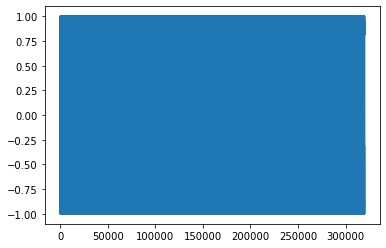

In [108]:
plt.plot(np.exp(1j*2*np.pi/fs*(-100)*np.arange(len(carrier_modulated_qpsk))))

In [140]:
baseband_qpsk = carrier_modulated_qpsk*np.exp(1j*2*np.pi/fs*(-100)*np.arange(len(carrier_modulated_qpsk)))

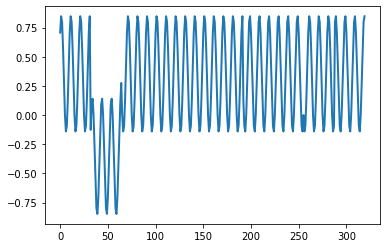

In [141]:
plt.plot(baseband_qpsk.real[:10*sps], linewidth=2)

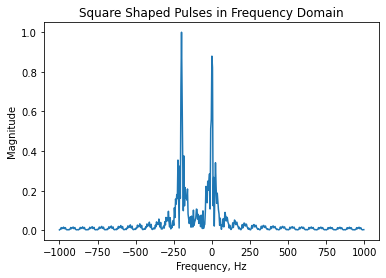

In [142]:
fft_size = 512

y_fft = np.fft.fft(baseband_qpsk,fft_size)
y_fft_square = np.fft.fftshift(y_fft)#[int(fft_size/2):]
freqs_fft = np.fft.fftfreq(fft_size,1/fs)
freqs = np.fft.fftshift(freqs_fft)#[int(fft_size/2):]

# Plot the result
plt.plot(freqs, np.abs(y_fft_square)/np.max(np.abs(y_fft_square)))
plt.xlabel('Frequency, Hz')
plt.ylabel('Magnitude')
plt.title('Square Shaped Pulses in Frequency Domain')
# plt.ylim((0,50))
plt.show()

In [180]:
demodded_pulses = np.convolve(baseband_qpsk, sinc_weights, mode='same')

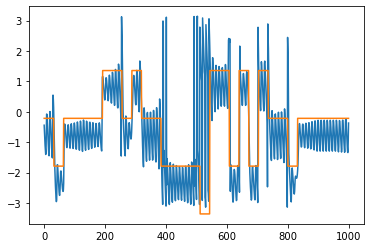

In [181]:
plt.plot(np.angle(demodded_pulses[:1000]))
plt.plot(np.angle(symbols_upsampled[:1000])-1)

# Plotting

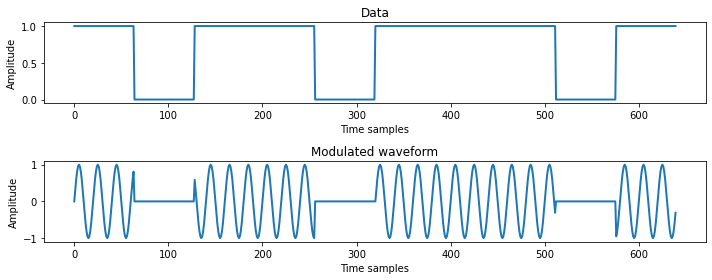

In [35]:
# Arbitary simulation params
num_bits = 100 # number of data bits to be transmitted
fs = 2000 # sampling frequency
f_c = 100 # carrier frequency
sps = 64 # samples per symbol

bits = np.random.randint(0,2,num_bits)
bits_upsampled = np.repeat(bits, sps)

carrier = np.sin(2*np.pi*f_c/fs*np.arange(len(bits_upsampled)))
carrier_modulated_2ask = carrier*(bits_upsampled)

fig, ax = plt.subplots(2,1, figsize=(10,4))
ax[0].set_xlabel('Time samples'); ax[0].set_ylabel('Amplitude')
ax[0].plot(bits_upsampled.real[:10*64], linewidth=2)
ax[0].set_title('Data')
ax[1].set_xlabel('Time samples'); ax[1].set_ylabel('Amplitude')
ax[1].plot(carrier_modulated_2ask[:10*64], linewidth=2)
ax[1].set_title('Modulated waveform')
plt.tight_layout()
plt.savefig('figures/2ask.png', dpi=300, bbox_inches="tight")

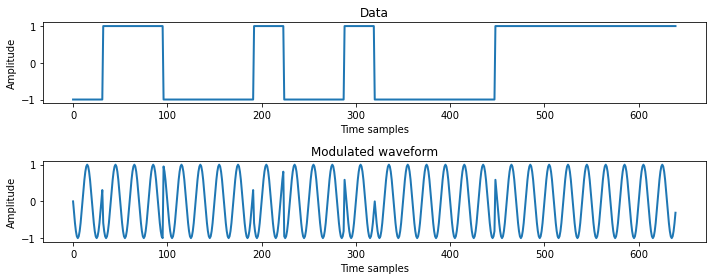

In [41]:
num_bits = 1000
fs = 2000
f_c = 100
sps = 32

bits = np.random.randint(0,2,num_bits)

symbol_dict = {0: -1+0j,
               1: +1+0j}

# Map the bits to the symbols
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))

# Again, upsampling is a simple "square" pulse shape
symbols_upsampled = np.repeat(symbols, sps)

carrier_modulated_bpsk = \
np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled))+np.angle(symbols_upsampled))


fig, ax = plt.subplots(2,1, figsize=(10,4))
ax[0].plot(symbols_upsampled.real[:10*64], linewidth=2)
ax[0].set_title('Data')
ax[0].set_xlabel('Time samples'); ax[0].set_ylabel('Amplitude')
ax[1].plot(carrier_modulated_bpsk[:10*64], linewidth=2)
ax[1].set_title('Modulated waveform')
ax[1].set_xlabel('Time samples'); ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.savefig('figures/2psk.png', dpi=300, bbox_inches="tight")

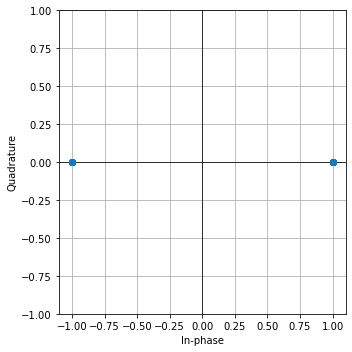

In [42]:
plt.figure(figsize=(5,5))
plt.axhline(y=0, color='k', linewidth=0.75)
plt.axvline(x=0, color='k', linewidth=0.75)
plt.ylim((-1,1))
plt.plot(symbols.real, symbols.imag, 'o')
plt.xlabel('In-phase'); plt.ylabel('Quadrature')
plt.grid()
plt.tight_layout()
plt.savefig('figures/bpsk_constellation.png', dpi=300, bbox_inches="tight")

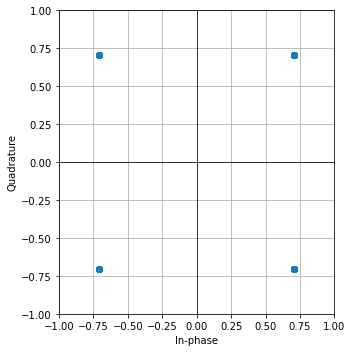

In [43]:
# Arbitrary simulation parameters
num_bits = 1000
fs = 2000
f_c = 100
sps = 32

# Our "bits" are integers in range of [0,3]
bits = np.random.randint(0,4,num_bits)

symbol_dict = {0: 0.7071+0.7071j,
               1: -0.7071+0.7071j,
               2: -0.7071-0.7071j,
               3: 0.7071-0.7071j}

# Map bits to symbols
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))

plt.figure(figsize=(5,5))
plt.axhline(y=0, color='k', linewidth=0.75)
plt.axvline(x=0, color='k', linewidth=0.75)
plt.plot(symbols.real, symbols.imag, 'o')
plt.xlabel('In-phase'); plt.ylabel('Quadrature')
plt.grid()
plt.ylim((-1,1)); plt.xlim((-1,1))
plt.tight_layout()
plt.savefig('figures/qpsk_constellation.png', dpi=300, bbox_inches="tight")

In [50]:
num_bits = 1000
fs = 2000
f_c = 100
sps = 32

# Our "bits" are integers in range of [0,3]
bits = np.random.randint(0,4,num_bits)

symbol_dict = {0: 0.7071+0.7071j,
               1: -0.7071+0.7071j,
               2: -0.7071-0.7071j,
               3: 0.7071-0.7071j}

# Map bits to symbols
symbols = np.array(list(map(lambda x:  symbol_dict[x], bits)))
# Again, upsampling is a simple "square" pulse shape
symbols_upsampled = np.repeat(symbols, sps)

carrier_modulated_qpsk_r = \
np.cos((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled.real))+np.angle(symbols_upsampled.real))
carrier_modulated_qpsk_i = \
-np.sin((2*np.pi*f_c)/fs*np.arange(len(symbols_upsampled.imag))+np.angle(symbols_upsampled.imag))

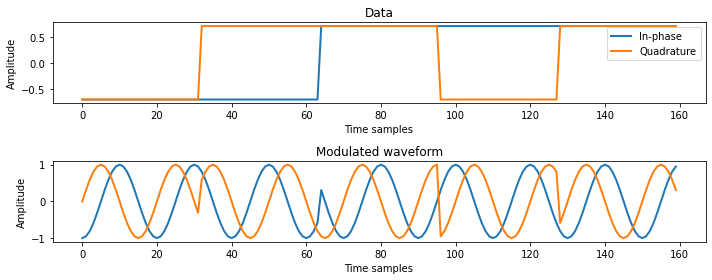

In [51]:
fig, ax = plt.subplots(2,1, figsize=(10,4))
ax[0].plot(symbols_upsampled.real[:5*32], linewidth=2)
ax[0].plot(symbols_upsampled.imag[:5*32], linewidth=2)
ax[0].set_title('Data')
ax[0].legend(('In-phase', 'Quadrature'))
ax[0].set_xlabel('Time samples'); ax[0].set_ylabel('Amplitude')
ax[1].plot(carrier_modulated_qpsk_r[:32*5], linewidth=2)
ax[1].plot(carrier_modulated_qpsk_i[:32*5], linewidth=2)
ax[1].set_title('Modulated waveform')
ax[1].set_xlabel('Time samples'); ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.savefig('figures/qpsk.png', dpi=300, bbox_inches="tight")

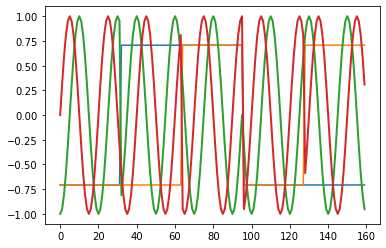

In [135]:
plt.plot(symbols_upsampled.real[:5*32])
plt.plot(symbols_upsampled.imag[:5*32])

plt.plot(carrier_modulated_qpsk_r[:32*5], linewidth=2)
plt.plot(carrier_modulated_qpsk_i[:32*5], linewidth=2)

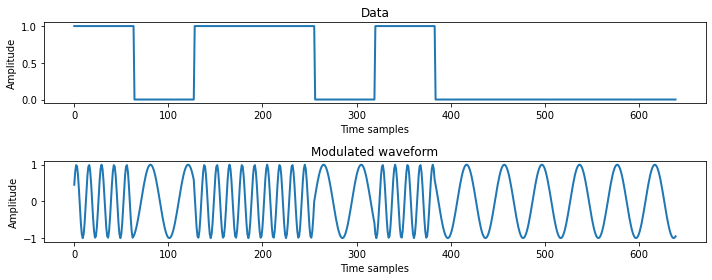

In [58]:
fs = 2000
num_bits = 1000
sps = 64

bits = np.random.randint(0,2,num_bits)
bits_upsampled = np.repeat(bits, sps)

# select frequencies that will be easy to eyeball in a time series plot
freqs = np.array([50 if x==0 else 150 for x in bits_upsampled])

# carrier modulation -- freqs replaces fc
carrier_modulated_2fsk = np.sin(((2*np.pi*freqs)/fs*np.arange(len(freqs))))

delta_phi = freqs * np.pi / (fs / 2)
phi = np.cumsum(delta_phi)
phi = (phi + np.pi) % (2 * np.pi) - np.pi # roll back phase to avoid adding to infinity
carrier_modulated_2cpfsk = np.sin(phi)


fig, ax = plt.subplots(2,1, figsize=(10,4))
ax[0].plot(bits_upsampled.real[:10*64], linewidth=2)
ax[0].set_title('Data')
ax[0].set_xlabel('Time samples'); ax[0].set_ylabel('Amplitude')
ax[1].plot(carrier_modulated_2cpfsk[:10*64], linewidth=2)
ax[1].set_title('Modulated waveform')
ax[1].set_xlabel('Time samples'); ax[1].set_ylabel('Amplitude')
plt.tight_layout()
plt.savefig('figures/2fsk.png', dpi=300, bbox_inches="tight")